<a href="https://colab.research.google.com/github/AhmedCoolProjects/ML/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification: determines the class label for an unlabeled test case. email filtiring, speach recognition, docs classifcations,...
* Decision Trees.
* Naive Bayes.
* Linear Disciminant Analysis.
* K-Nearest Neighbor.
* Logistic Regression.
* Neural Networks.
* Support Vector Machines.
> K-Nearest Neighbor: Similar cases with same class labels are near each other.


Evaluation Metrics for classification:
* Jaccard index: |y inter **y**| / |y union **y**|, |y union **y**| = |y|+|**y**|-|y inter **y**|
* F1-score: confusion metrix, precision = TP/(TP+FP), recall = TP/(TP+FN). f1-score = 2(prc*rec)/(prc+rec).
f1-score => 1.0 means higher accuracy. avg accuracy is the avg of the all f1-scores for all classes.
* Log Loss: => 0.0 means higher accuracy.
> logloss = -(1/n).Sigma(y.log(**y**) + (1-y).log(1-**y**))

# K-Nearest Neighbors
## categorizing telecommunications provider custemers.

In [ ]:
# downloading the dataset.
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv('/content/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

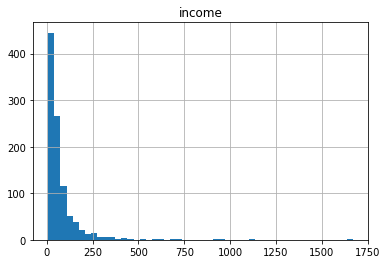

In [8]:
df.hist(column='income',bins=50)
plt.show()

In [9]:
X = df.drop('custcat',axis=1).values # this is a numpy array

In [12]:
Y = df[['custcat']].values

In [13]:
Y[:5]

array([[1],
       [4],
       [3],
       [1],
       [3]])

In [14]:
X[:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [15]:
# standardization our X data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [19]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 11) (800, 1)
(200, 11) (200, 1)


In [22]:
# building the model
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [23]:
# predicting test dataset
Y_test_pre = neigh.predict(X_test)
Y_test_pre[:5]

array([1, 1, 3, 2, 4])

In [25]:
# accuracy evaluation
from sklearn.metrics import accuracy_score
print('Train set accuracy : ', accuracy_score(Y_train,neigh.predict(X_train)))
print('Test set accuracy : ',accuracy_score(Y_test,neigh.predict(X_test)))

Train set accuracy :  0.5475
Test set accuracy :  0.32


In [26]:
# lets try with k = 6
# building the model
k = 6
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [27]:
# evaluation
print('train set accuracy ',accuracy_score(Y_train,neigh.predict(X_train)))
print('test set accuracy ',accuracy_score(Y_test,neigh.predict(X_test)))

train set accuracy  0.51625
test set accuracy  0.31


for k=4 and k=6, we got accuracy of 0.32,0.31 which still not good.

lets determine the best k for our dataset.

In [33]:
ks=10
mean_acc = np.zeros((ks-1))
len(mean_acc)

9

In [ ]:
for i in range(1,ks):
  neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
  mean_acc[i - 1] = accuracy_score(Y_test,neigh.predict(X_test))
mean_acc

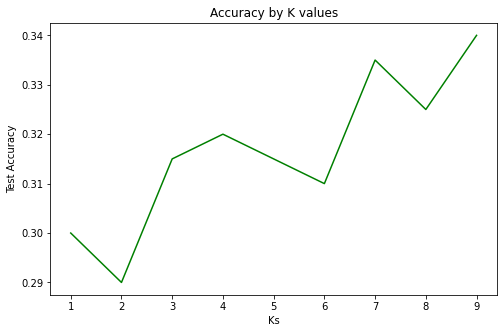

In [37]:
plt.figure(figsize=(8,5))
plt.title('Accuracy by K values')
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('Ks')
plt.ylabel('Test Accuracy')
plt.show()

then: the best accuracy is for K=9, acc = 0.34